<a href="https://colab.research.google.com/github/ccastr0911/BeduProject1/blob/main/Proyecto_Machine_Learning_Proyeccion_Ventas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo Machine Learning para Proyección de Ventas ( Mediante Regresion Polinomial y Redes Neuronales ⭕

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

## **Exploración y Limpieza de Datos **

In [2]:
data = pd.read_csv("/content/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})
data.shape

(541909, 8)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [5]:
data.isna().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data['Description'] = data['Description'].fillna('Unknown')
data['CustomerID'] = data['CustomerID'].fillna('Unknown')

In [7]:
data.isna().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [9]:
import plotly.express as px

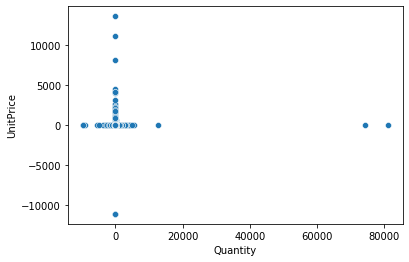

In [42]:
sns.scatterplot(data=data, x="Quantity", y="UnitPrice")


In [11]:

data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate, cache=True)

data.InvoiceDate.max() - data.InvoiceDate.min()

Timedelta('373 days 04:24:00')

In [12]:
data["IsCancelled"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

False    98.286059
True      1.713941
Name: IsCancelled, dtype: float64

In [13]:
data = data.loc[data.IsCancelled==False].copy()
data = data.drop("IsCancelled", axis=1)

In [14]:
data['Country'].unique()  

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [15]:
data["Income"] = data.Quantity * data.UnitPrice

In [16]:
counts = data['Country'].value_counts()
counts

United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [17]:
counts * 100 / counts.sum()

United Kingdom          91.551403
Germany                  1.697642
France                   1.578608
EIRE                     1.482105
Spain                    0.466561
Netherlands              0.443655
Belgium                  0.381322
Switzerland              0.369306
Portugal                 0.281814
Australia                0.222485
Norway                   0.201269
Italy                    0.142315
Channel Islands          0.140438
Finland                  0.128609
Cyprus                   0.115279
Sweden                   0.084676
Unspecified              0.083737
Austria                  0.074725
Denmark                  0.071345
Poland                   0.061958
Japan                    0.060268
Israel                   0.055386
Hong Kong                0.053321
Singapore                0.041681
Iceland                  0.034171
USA                      0.033607
Canada                   0.028350
Greece                   0.027224
Malta                    0.021028
United Arab Em

In [18]:
as_percentages = counts * 100 / counts.sum()

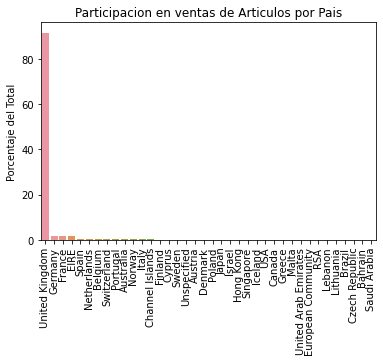

In [19]:

ax = sns.barplot(x=as_percentages.index, y=as_percentages) # x = categorías, y = frecuencia de cada
# categoría
ax.set_title('Participacion en ventas de Articulos por Pais')
ax.set(ylabel='Porcentaje del Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

# **Volvemos los datos en series de Tiempo**

In [29]:
data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


# **Encontramos los datos atipicos y hacemos un filtrado correcto de datos **

In [30]:
data.UnitPrice.describe()

count    532621.000000
mean          3.847621
std          41.758023
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [31]:
print(f'Valor mínimo: {data["UnitPrice"].min()}')
print(f'Percentil 0: {data["UnitPrice"].quantile(0)}')
print(f'Percentil 5: {data["UnitPrice"].quantile(0.05)}')
print(f'Percentil 25: {data["UnitPrice"].quantile(0.25)}')
print(f'Percentil 50: {data["UnitPrice"].median()}')
print(f'Percentil 75: {data["UnitPrice"].quantile(0.75)}')
print(f'Percentil 90: {data["UnitPrice"].quantile(0.9)}')
print(f'Percentil 97: {data["UnitPrice"].quantile(0.97)}')
print(f'Valor máximo: {data["UnitPrice"].max()}')
print()


Valor mínimo: -11062.06
Percentil 0: -11062.06
Percentil 5: 0.42
Percentil 25: 1.25
Percentil 50: 2.08
Percentil 75: 4.13
Percentil 90: 7.95
Percentil 97: 12.72
Valor máximo: 13541.33



In [32]:
data_reducida = (data['UnitPrice'] > 0.42) & (data['UnitPrice'] < 12.72)

In [33]:
data.Quantity.describe()

count    532621.000000
mean         10.239972
std         159.593551
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [34]:
print(f'Valor mínimo: {data["Quantity"].min()}')
print(f'Percentil 0: {data["Quantity"].quantile(0)}')
print(f'Percentil 5: {data["Quantity"].quantile(0.05)}')
print(f'Percentil 25: {data["Quantity"].quantile(0.25)}')
print(f'Percentil 50: {data["Quantity"].median()}')
print(f'Percentil 75: {data["Quantity"].quantile(0.75)}')
print(f'Percentil 90: {data["Quantity"].quantile(0.9)}')
print(f'Percentil 98: {data["Quantity"].quantile(0.98)}')
print(f'Valor máximo: {data["Quantity"].max()}')
print()


Valor mínimo: -9600
Percentil 0: -9600.0
Percentil 5: 1.0
Percentil 25: 1.0
Percentil 50: 3.0
Percentil 75: 10.0
Percentil 90: 24.0
Percentil 98: 72.0
Valor máximo: 80995



In [35]:
data_reducida2 = (data['UnitPrice'] > 1) & (data['UnitPrice'] < 72)

In [36]:
data_sin_errores = data[data_reducida & data_reducida2]

In [37]:
data_sin_errores

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Income,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,4,12,49,4,9,343,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09


In [38]:
data_sin_errores.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Income,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403081,541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09
403082,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,4,12,49,4,9,343,2011-12-09
403083,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09
403084,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,4,12,49,4,9,343,2011-12-09


# Volvemos nuestras variables en Ventas diarias para proyección

In [39]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [40]:
ventas_diarias = pd.DataFrame(data_sin_errores.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
ventas_diarias["Income"] = data_sin_errores.groupby(grouped_features).Income.sum()
ventas_diarias["UnitPrice"] = data_sin_errores.groupby(grouped_features).UnitPrice.sum()
ventas_diarias = ventas_diarias.reset_index()
ventas_diarias.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Income,UnitPrice
0,2010-12-01,2010,4,12,48,2,335,1,10135,1,2.51,2.51
1,2010-12-01,2010,4,12,48,2,335,1,11001,3,10.08,3.36
2,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95,2.95
3,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00,16.85
4,2010-12-01,2010,4,12,48,2,335,1,15056N,50,236.30,16.15


In [41]:
ventas_diarias.loc[:, ["Quantity", "Income", "UnitPrice"]].describe()

,Quantity,Income,UnitPrice
count,210069.000000,210069.000000,210069.000000
mean,16.338674,41.127638,6.646986
std,244.145143,421.028137,7.289120
min,1.000000,1.050000,1.040000
25%,2.000000,5.900000,2.460000
50%,5.000000,15.300000,4.150000
75%,13.000000,34.960000,8.260000
max,80995.000000,168469.600000,133.450000


# **Regresión Lineal y Polinomial** "Series de Tiempo": ⚡

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
X = ventas_diarias[['Quantity', 'UnitPrice']]
y = ventas_diarias['Income']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(126041, 2)
(84028, 2)
(126041,)
(84028,)


In [48]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =3284.5187050214354
Pruebas: MSE =81757.45360744046


In [50]:
print(lin_model.score(X_train, y_train))
print(lin_model.score(X_test, y_test))

0.7674531772564732
0.806246406847392


In [51]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=6)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =2914.3688597094674
Pruebas: MSE =6.601971225063595e+23


,valor_real,prediccion,diferencia
0,37.94,44.118648,-6.178648
1,167.64,221.971487,-54.331487
2,8.29,18.870382,-10.580382
3,64.68,64.669966,0.010034
4,89.10,69.478127,19.621873
5,5.95,17.612244,-11.662244
6,13.16,19.049830,-5.889830
7,61.20,33.796964,27.403036
8,1.63,16.665863,-15.035863
9,15.00,17.456726,-2.456726


In [55]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
X2 = ventas_diarias[['Quantity', 'UnitPrice']]
y2 = ventas_diarias['Income']

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[2])

In [ ]:

model = tf.keras.Sequential([l0])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

In [129]:

history = model.fit(X2, y2, epochs=500, verbose=True)

Epoch 1/500
6565/6565 [==============================] - 11s 2ms/step - loss: 11844.9014
Epoch 2/500
6565/6565 [==============================] - 10s 1ms/step - loss: 116733.0469
Epoch 3/500
6565/6565 [==============================] - 10s 2ms/step - loss: 68197.9297
Epoch 4/500
6565/6565 [==============================] - 10s 2ms/step - loss: 40518.2617
Epoch 5/500
6565/6565 [==============================] - 10s 2ms/step - loss: 268861.4062
Epoch 6/500
6565/6565 [==============================] - 10s 2ms/step - loss: 34270.4688
Epoch 7/500
6565/6565 [==============================] - 10s 2ms/step - loss: 41045.3945
Epoch 8/500
6565/6565 [==============================] - 10s 1ms/step - loss: 59684.4414
Epoch 9/500
6565/6565 [==============================] - 10s 1ms/step - loss: 173352.9688
Epoch 10/500
6565/6565 [==============================] - 11s 2ms/step - loss: 233908.6406
Epoch 11/500
6565/6565 [==============================] - 10s 2ms/step - loss: 54952.5352
Epoch 12/500
65

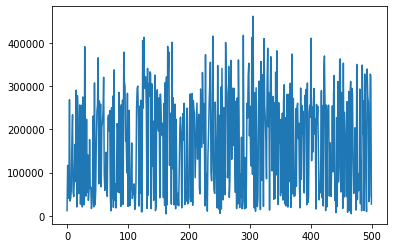

In [130]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"]);

In [132]:
l0.get_weights()

[array([[-0.5371658],
        [ 7.0399733]], dtype=float32), array([5.3294487], dtype=float32)]

In [142]:
l0 = tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')

In [143]:
l1 = tf.keras.layers.Dense(units=8, activation='relu')

In [144]:
l2 = tf.keras.layers.Dense(1, activation="sigmoid")

In [145]:
model2 = tf.keras.Sequential([l0, l1, l2])

In [146]:
model2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.1), metrics=['Accuracy', 'binary_crossentropy'])

In [147]:
history2 = model2.fit(X, y, epochs=50, verbose=True, validation_split=0.1)

Epoch 1/50
5909/5909 [==============================] - 14s 2ms/step - loss: -9181.1777 - Accuracy: 0.0000e+00 - binary_crossentropy: -9181.1777 - val_loss: -23247.3496 - val_Accuracy: 0.0000e+00 - val_binary_crossentropy: -23247.3496
Epoch 2/50
5909/5909 [==============================] - 13s 2ms/step - loss: -26053.0820 - Accuracy: 0.0000e+00 - binary_crossentropy: -26053.0820 - val_loss: -45925.9570 - val_Accuracy: 0.0000e+00 - val_binary_crossentropy: -45925.9570
Epoch 3/50
5909/5909 [==============================] - 12s 2ms/step - loss: -44572.1719 - Accuracy: 0.0000e+00 - binary_crossentropy: -44572.1719 - val_loss: -69283.5391 - val_Accuracy: 0.0000e+00 - val_binary_crossentropy: -69283.5391
Epoch 4/50
5909/5909 [==============================] - 12s 2ms/step - loss: -62439.4805 - Accuracy: 0.0000e+00 - binary_crossentropy: -62439.4805 - val_loss: -92520.0078 - val_Accuracy: 0.0000e+00 - val_binary_crossentropy: -92520.0078
Epoch 5/50
5909/5909 [==============================] 

In [149]:
Income1 = (3., 3.)
Income2 = (9., 10.)
Income3 = (7., 7.)

model.predict([Income1, Income2, Income3])

array([[24.837872],
       [70.894684],
       [50.849102]], dtype=float32)

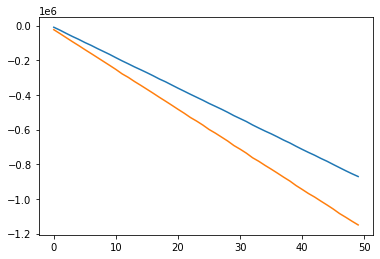

In [148]:
import matplotlib.pyplot as plt

plt.plot(history2.history["loss"]);
plt.plot(history2.history["val_loss"]);

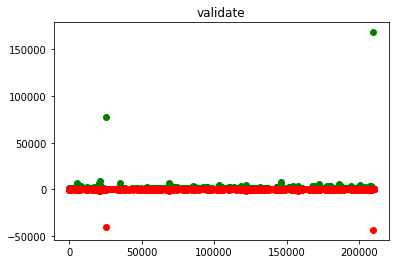

In [163]:

results=model.predict(X2)
plt.scatter(range(len(y2)),y2,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()